<a href="https://colab.research.google.com/github/Tanat1150/mini-6310210159/blob/main/mini_project_6310210159.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


การเตรียมข้อมูล (Preparing Data)

In [17]:
data1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/344-331/disney_plus_titles.xlsx')

In [18]:
print(data1.columns)
data1.head(10)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


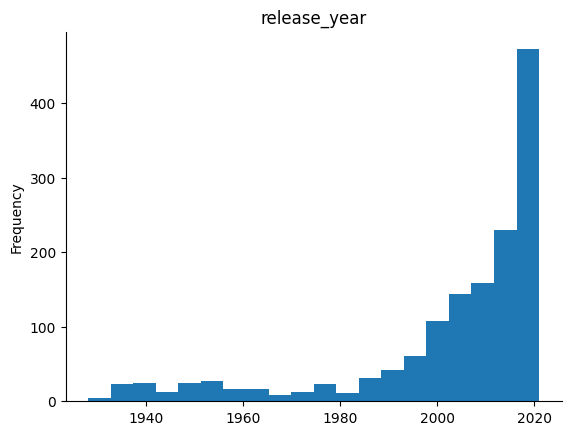

In [19]:
# @title release_year

from matplotlib import pyplot as plt
data1['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
data1.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [22]:
data1_uniques = pd.DataFrame([[i, len(data1[i].unique())] for i in data1.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
data1_uniques

,Unique Values
Variable,
show_id,1450
type,2
title,1450
director,610
cast,1194
country,90
date_added,168
release_year,90
rating,10


In [24]:
for attr in data1.columns:
    print('\n', attr)
    print(data1[attr].value_counts())


 show_id
s1       1
s974     1
s972     1
s971     1
s970     1
        ..
s483     1
s482     1
s481     1
s480     1
s1450    1
Name: show_id, Length: 1450, dtype: int64

 type
Movie      1052
TV Show     398
Name: type, dtype: int64

 title
Duck the Halls: A Mickey Mouse Christmas Special    1
James and the Giant Peach                           1
Jack                                                1
Iron Will                                           1
Iron Man Armored Adventures                         1
                                                   ..
Ice Age: Collision Course                           1
Hamilton                                            1
Diary of a Wimpy Kid: Rodrick Rules                 1
Animal ER                                           1
Captain Sparky vs. The Flying Saucers               1
Name: title, Length: 1450, dtype: int64

 director
Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols   

In [25]:
for i in data1.columns:
  print(i, data1[i].unique())

show_id ['s1' 's2' 's3' ... 's1448' 's1449' 's1450']
type ['Movie' 'TV Show']
title ['Duck the Halls: A Mickey Mouse Christmas Special'
 'Ernest Saves Christmas' 'Ice Age: A Mammoth Christmas' ...
 'Eddie the Eagle' 'Bend It Like Beckham'
 'Captain Sparky vs. The Flying Saucers']
director ['Alonso Ramirez Ramos, Dave Wasson' 'John Cherry' 'Karen Disher'
 'Hamish Hamilton' nan 'Liz Garbus' 'Kirk R. Thatcher' 'John Gleim'
 'Leslie Iwerks' 'McKenna Harris' 'Kevin Lima' 'Patrick Osborne'
 'Chris Buck, Jennifer Lee' 'Lauren MacMullan' 'Dan Mazer'
 'Jaume Collet-Serra' 'John Kahrs' 'Destin Daniel Cretton'
 'Manjari Makijany' 'Nathan Greno, Byron Howard'
 'Stevie Wermers-Skelton, Kevin Deters' 'Roger Allers' 'David Clair'
 'David Silverman' 'Dean Wellins' 'Mike Mitchell' 'Brian Levant'
 'Alex Zamm' 'Kevin Deters, Stevie Wermers-Skelton' 'Robert Vince'
 'Matthew Vaughn' 'Niki Caro' 'Daniel Stern' 'Don Bluth, Gary Goldman'
 'Jim Greayer' 'Ben Crichton' 'Jeff Gordon' 'Kirk Thatcher' 'Dave Hoffma

feature extraction

In [28]:
# เพิ่มคอลัมน์ใน DataFrame แสดงค่าก่อนการแปลง
data1_before_encoding = data1.copy()

# Use LabelEncoder to do the numeric transformation
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in data1:
    # Compare if the dtype is object
    if data1[col].dtype == 'object':
        # Use LabelEncoder to do the numeric transformation
         data1[col] = le.fit_transform(data1[col])

# แสดงค่าก่อนและหลังการแปลง
for col in data1_before_encoding.columns:
    print(col)
    for before, after in zip(data1_before_encoding[col].unique(), data1[col].unique()):
        print(before, "->", after)
    print()


เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Tut's Treasures: Hidden Secrets -> 1352
A Tale of Two Critters -> 19
All in a Nutshell -> 34
Disneynature Penguins -> 325
Diving with Dolphins -> 327
Dolphin Reef -> 333
Don's Fountain of Youth -> 334
Donald's Dog Laundry -> 336
Double Dribble -> 341
Dragon Around -> 348
Elephant -> 374
Elmer Elephant -> 375
Fish Hooks -> 409
How To Play Football -> 531
In the Footsteps of Elephant -> 551
Lambert, The Sheepish Lion -> 632
On Ice -> 835
Onward -> 846
Out of Scale -> 852
Penguins: Life on the Edge -> 864
Pluto's Party -> 899
Sea Scouts -> 973
Sonny With A Chance -> 1024
The Boy Who Talked to Badgers -> 1127
The New Neighbor -> 1220
The Small One -> 1269
The Straight Story -> 1274
Frankenweenie -> 431
Mars Needs Moms -> 683
Prom -> 918
The Last Song -> 1185
The Odd Life of Timothy Green -> 1222
Be Our Chef -> 79
A Wrinkle in Time -> 20
Disney I Didn't Do It -> 258
Disney Insider -> 259
Disney Vampirina Ghoul Girls Rock! (Shorts) -> 

In [29]:
for i in data1.columns:
  print(i,  data1[i].unique())

show_id [  0 562 673 ... 499 500 502]
type [0 1]
title [357 381 542 ... 368  94 151]
director [ 14 287 317 216 609 361 340 288 356 393 337 435  97 348 116 254 293 147
 368 422 549 494 129 141 144 407  75  10 335 488 391 427 122 153 274  40
 261 341 126  90 290 569 583 327 486  15 253 308 433 507 255 320 363 475
  31 484 523 111 447 419 163 192 529 570  81 357  98 377 448  89 453 344
  38  23  88 334 401 562 521 384 506 238 140 133 176 198 431   1 156  29
 604  32 217  27 530 269 416 537  71 539 339 333 191 436 574 284 328 160
 251 120 603 294 278 485 519 132 515 324 322  99 566 113 260 146 351 307
 480  21 286 420 218 590 541 365 279  69 366 441 403 468 463 518 347 405
  35  25 342  63 456 561 451 490 528 578 305 115  41  26 316 464 353 394
 103 534 239 559 415  24 379 181 370 508 481 232 241  49 385 558 438 383
 452 396 155 408  44 538 268  48 567 117  65 271 527 281 592 128 302 497
 564 410 224 587  30 338  77  39 303 440  37 189 329 215 595 560 332  95
 250 202 546 263 280 229  19 4

In [36]:
data1.to_csv('encode_data.csv', index=False)
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,357,14,210,89,133,2016,4,76,129,784
1,562,0,381,287,576,89,133,1988,1,149,186,1079
2,673,0,542,317,909,45,133,2011,4,76,116,1103
3,784,0,1244,216,277,89,133,2021,5,90,321,1267
4,895,1,1115,609,602,89,132,2021,9,0,277,230


In [49]:
# บันทึก DataFrame ลงในไฟล์ CSV
data1.to_excel('disney_plus_titles.xlsx', index=False)


In [66]:
max_value = data.max()
min_value = data.min()

print("Maximum value:", max_value)
print("Minimum value:", min_value)

Maximum value: show_id                                                      s999
type                                                      TV Show
title                                                    Zootopia
release_year                                                 2021
duration                                                   99 min
listed_in                                                 Variety
description     โ€What Ifโ€ฆ?โ€ flips the script on the MCU ...
dtype: object
Minimum value: show_id                                                        s1
type                                                        Movie
title                                  10 Things I Hate About You
release_year                                                 1928
duration                                                 1 Season
listed_in           Action-Adventure, Animals & Nature, Animation
description     "Fauci" reveals the extraordinary life and car...
dtype: object


<ipython-input-66-a13373e77bf0>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  max_value = data.max()
<ipython-input-66-a13373e77bf0>:2: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_value = data.min()
